# **LIME**

Source of dataset: https://www.kaggle.com/datasets/ashishsaxena2209/animal-image-datasetdog-cat-and-panda?resource=download

https://towardsdatascience.com/interpreting-image-classification-model-with-lime-1e7064a2f2e5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install lime

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import backend as K
import os
import tensorflow as tf

import lime
from lime import lime_image

from tensorflow.keras.applications import inception_v3 as inc_net
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import skimage
from skimage import io
from tensorflow.keras.preprocessing import image
from skimage.segmentation import mark_boundaries
from keras.models import load_model

In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
#url = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Model_Training_Dataset/Test/Benign/IM235_2.jpg'
url = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Model_Training_Dataset/Train/Malignant/Folder_13_3_1_img28.jpg'
url = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Model_Training_Dataset/Train/Malignant/Folder_20_3_1_img4.jpg'

def transform_img_fn_ori(url):

    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (224,224))
    img = (img - 0.5)*2
    img = np.expand_dims(img, axis=0)
    preds = model.predict(img)
    '''
    for i in decode_predictions(preds)[0]:
        print(i)
    '''
    return img

model = load_model('/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Ovarian_Image_classification_ResNet60.h5')
images_inc_im = transform_img_fn_ori(url)

1/1 [==============================] - 2s 2s/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


(-0.5, 223.5, 223.5, -0.5)

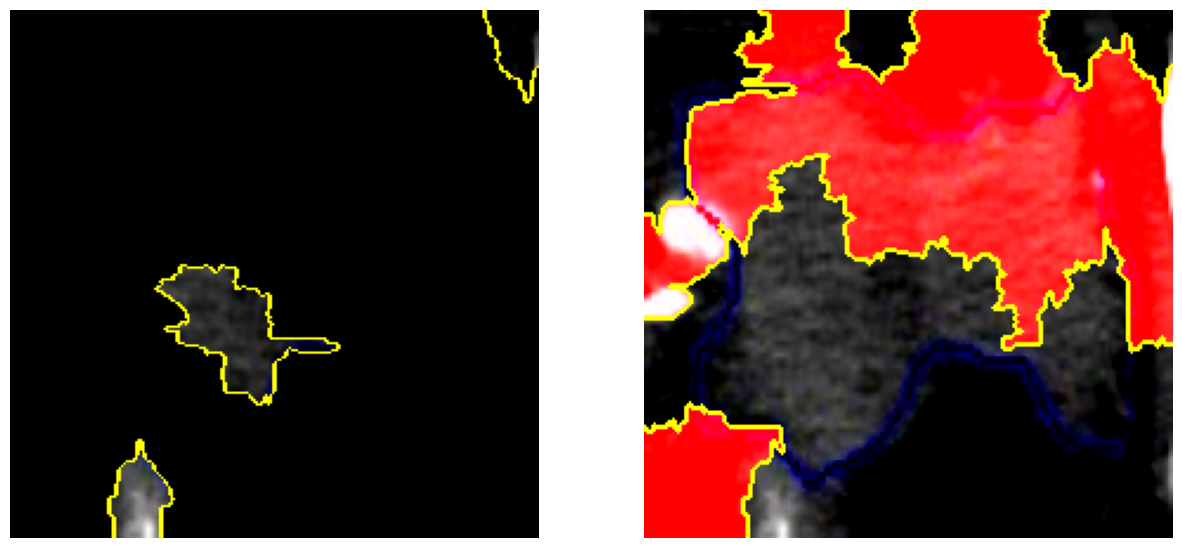

In [ ]:
explanation= explainer.explain_instance(images_inc_im[0].astype('double'), model.predict,  top_labels=3, hide_color=0, num_samples=1000)

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

In [ ]:
url = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Model_Training_Dataset/Train/Benign/Folder_60_3_1_img252.jpg'
url = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Model_Training_Dataset/Train/Benign/Folder_60_3_1_img188.jpg'

url = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Benign/Folder_3_1_4_img064.jpeg'
url = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Benign/IMG-0015.jpg'

def transform_img_fn_ori(url):

    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (224,224))
    img = (img - 0.5)*2
    img = np.expand_dims(img, axis=0)
    preds = model.predict(img)
    '''
    for i in decode_predictions(preds)[0]:
        print(i)
    '''
    return img

model = load_model('/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Ovarian_Image_classification_ResNet60.h5')
images_inc_im = transform_img_fn_ori(url)

1/1 [==============================] - 2s 2s/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


(-0.5, 223.5, 223.5, -0.5)

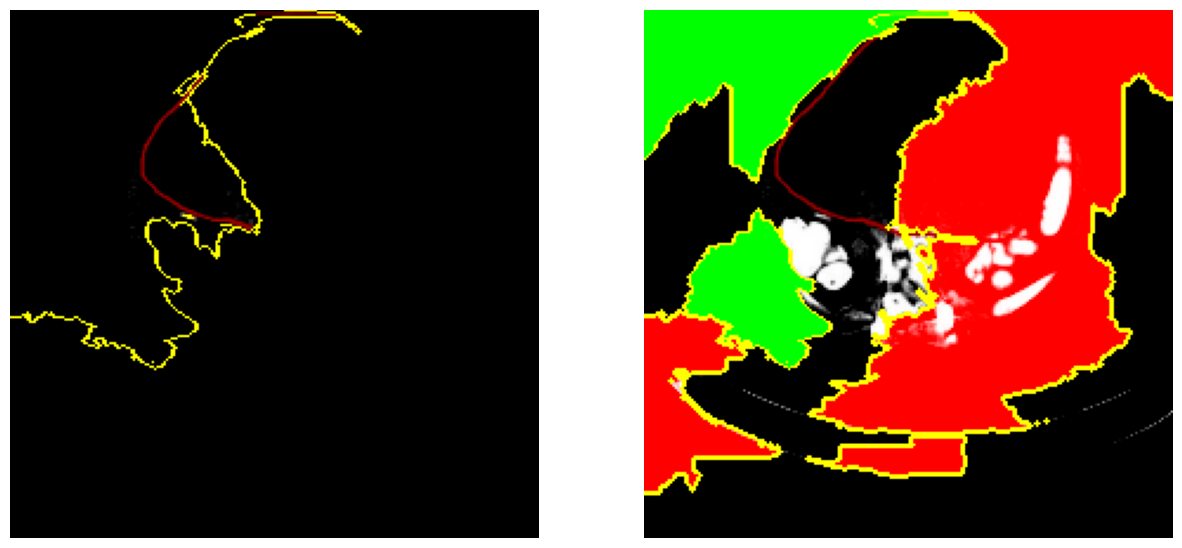

In [ ]:
explanation= explainer.explain_instance(images_inc_im[0].astype('double'), model.predict,  top_labels=3, hide_color=0, num_samples=1000)

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')